<a href="https://colab.research.google.com/github/nguyenhuuhoang3697/Logistic-Regression-from-scratch/blob/main/Run_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Building Model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
run '/content/drive/MyDrive/Môn tối ưu hóa/Thuyết trình lần 2/main.py'

In [ ]:
run main.py

Columns with outliers: ['LaivayDukien', 'TongChiphi', 'TongThu-TongChi', 'LuongPhucap', 'TongThunhap', 'SoduTienguiKyhan', 'SoduTienguiTT', 'SoluongSPvay', 'SLTCTD', 'ThoigianQHTD_nam', 'SoNguoiPhuthuoc', 'Tuoi', 'ThoigianCongtac_thang', 'SotienVay', 'ThoigianVay']


In [3]:
import time

In [4]:
# Logistic Regression using Gradient Descent with Loss Tracking
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-7):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred_proba):
        epsilon = 1e-15  # To avoid log(0)
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y_true)
        return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        m = X.shape[0]

        for _ in range(self.max_iter):
            predictions = self.sigmoid(np.dot(X, self.coef_))
            error = y - predictions
            gradient = np.dot(X.T, error) / m
            self.coef_ += self.learning_rate * gradient

            # Calculate and record loss
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [5]:
# Logistic Regression using Gradient Descent with Loss Tracking
class LogisticRegressionGDL1:
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-7, l1_lambda=0.1):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.l1_lambda = l1_lambda

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred_proba):
        epsilon = 1e-15  # To avoid log(0)
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y_true)
        return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        m = X.shape[0]

        for _ in range(self.max_iter):
            predictions = self.sigmoid(np.dot(X, self.coef_))
            error = y - predictions
            gradient = np.dot(X.T, error) / m + self.l1_lambda * np.sign(self.coef_)
            self.coef_ = self.coef_ - self.learning_rate * gradient

            # Calculate and record loss
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [6]:
# Logistic Regression using Gradient Descent with Loss Tracking
class LogisticRegressionGDL2:
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-7, l2_lambda=0.1):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.l2_lambda = l2_lambda

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred_proba):
        epsilon = 1e-15  # To avoid log(0)
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y_true)
        return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        m = X.shape[0]

        for _ in range(self.max_iter):
            predictions = self.sigmoid(np.dot(X, self.coef_))
            error = y - predictions
            gradient = np.dot(X.T, error) / m + 2 * self.l2_lambda * self.coef_
            self.coef_ = self.coef_ - self.learning_rate * gradient

            # Calculate and record loss
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_))) + self.l2_lambda * np.linalg.norm(self.coef_, ord=2) ** 2
            self.loss_history.append(loss)

            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [7]:
# Logistic Regression using Gradient Descent with Back Tracking
class LogisticRegressionGDbacktracking:
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-7, alpha=0.3, beta=0.8, initial_learningrate=1):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.alpha = alpha
        self.beta = beta
        self.initial_learningrate = initial_learningrate

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred_proba):
        epsilon = 1e-15  # To avoid log(0)
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y_true)
        return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

    def backtracking_line_search(self, X, y, gradient):
        t = self.initial_learningrate
        current_loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
        while self.log_loss(y, self.sigmoid(np.dot(X, self.coef_ - t * gradient))) > current_loss - self.alpha * t * np.dot(gradient.T, gradient):
            t *= self.beta
        return t

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        m = X.shape[0]

        for _ in range(self.max_iter):
            predictions = self.sigmoid(np.dot(X, self.coef_))
            error = y - predictions
            gradient = np.dot(X.T, error) / m
            learning_rate = self.backtracking_line_search(X, y, gradient)
            self.coef_ = self.coef_ - learning_rate * gradient

            # Calculate and record loss
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            # Check for convergence
            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [8]:
# Logistic Regression using Gradient Descent with Nesterov Accelerated Gradient Descent (NAGD)
class LogisticRegressionNAGD:
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-7, momentum=0.9):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.momentum = momentum

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred_proba):
        epsilon = 1e-15  # To avoid log(0)
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y_true)
        return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

    def gradient(self, X, y, theta):
        predictions = self.sigmoid(np.dot(X, theta))
        error = y - predictions
        gradient = -np.dot(X.T, error) / len(y)
        return gradient

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.velocity = np.zeros(X.shape[1])
        self.loss_history = []
        m = X.shape[0]

        for _ in range(self.max_iter):
            # Compute the lookahead step
            theta_lookahead = self.coef_ + self.momentum * self.velocity

            # Compute gradient at the lookahead position
            gradient = self.gradient(X, y, theta_lookahead)

            # Update the velocity and coefficients
            self.velocity = self.momentum * self.velocity - self.learning_rate * gradient
            self.coef_ = self.coef_ + self.velocity

            # Calculate and record loss
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            # Check for convergence
            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [9]:
# Logistic Regression using Stochastic Gradient Descent (SGD) with Fixed Step Size
class LogisticRegressionSGD_fixed_step:
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-7):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred_proba):
        epsilon = 1e-15  # To avoid log(0)
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y_true)
        return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

    def compute_gradient(self, X, y):
        epsilon = 1e-15  # Một giá trị nhỏ
        z = np.dot(X, self.coef_)
        h = self.sigmoid(z)
        h = np.clip(h, epsilon, 1 - epsilon)
        gradient = np.dot(X.T, (h - y)) / len(y)
        return gradient

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        m = X.shape[0]

        for iteration in range(self.max_iter):
            indices = np.random.permutation(m)
            for i in indices:
                xi = X[i:i+1]
                yi = y[i:i+1]
                gradient = self.compute_gradient(xi, yi)

                # Update coefficients using fixed learning rate
                self.coef_ -= - self.learning_rate * gradient

            # Calculate and record loss at the end of each iteration
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            # Check for convergence
            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [10]:
# Logistic Regression using Stochastic Gradient Descent (SGD) with Fixed Step Size and Batch Size
class LogisticRegressionSGD_batch_size:
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-7, batch_size=100):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.batch_size = batch_size

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred_proba):
        epsilon = 1e-15  # To avoid log(0)
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y_true)
        return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        y = np.array(y)
        m = X.shape[0]

        for iteration in range(self.max_iter):
            # Shuffle data at the start of each iteration
            indices = np.arange(m)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, m, self.batch_size):
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]

                predictions = self.sigmoid(np.dot(X_batch, self.coef_))
                error = y_batch - predictions
                gradient = -np.dot(X_batch.T, error) / len(y_batch)

                # Update coefficients using fixed learning rate
                self.coef_ = self.coef_ - self.learning_rate * gradient

            # Calculate and record loss at the end of each iteration
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            # Check for convergence
            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [23]:
# Logistic Regression using Stochastic Gradient Descent (SGD) with 1/k Learning Rate Decay
class LogisticRegressionSGD1k:
    def __init__(self, initial_learning_rate=0.01, max_iter=1000, tol=1e-7):
        self.initial_learning_rate = initial_learning_rate
        self.max_iter = max_iter
        self.tol = tol

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred_proba):
        epsilon = 1e-15  # To avoid log(0)
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y_true)
        return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        y = np.array(y)
        m = X.shape[0]

        for iteration in range(1, self.max_iter + 1):
            # Shuffle data at the start of each iteration
            indices = np.arange(m)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(m):
                xi = X_shuffled[i:i+1]
                yi = y_shuffled[i:i+1]

                prediction = self.sigmoid(np.dot(xi, self.coef_))
                error = yi - prediction
                gradient = -xi.T * error

                # Learning rate decays as 1/k
                learning_rate = self.initial_learning_rate / iteration

                # Update coefficients using decaying learning rate
                self.coef_ = self.coef_ - learning_rate * gradient.ravel()

            # Calculate and record loss at the end of each iteration
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            # Check for convergence
            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [12]:
# Logistic Regression using Stochastic Gradient Descent (SGD) with 1/k Learning Rate Decay mini batch
class LogisticRegressionSGD1k_mini_batch:
    def __init__(self, initial_learning_rate=0.01, max_iter=1000, tol=1e-7, batch_size=32):
        self.initial_learning_rate = initial_learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.batch_size = batch_size

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred_proba):
        epsilon = 1e-15  # To avoid log(0)
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y_true)
        return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        m = X.shape[0]

        for iteration in range(1, self.max_iter + 1):
            # Shuffle data at the start of each iteration
            indices = np.arange(m)
            np.random.shuffle(indices)
            X = X[indices]
            y = y[indices]

            for i in range(0, m, self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]

                predictions = self.sigmoid(np.dot(X_batch, self.coef_))
                error = y_batch - predictions
                gradient = -np.dot(X_batch.T, error) / len(y_batch)

                # Learning rate decays as 1/k
                learning_rate = self.initial_learning_rate / iteration

                # Update coefficients using decaying learning rate
                self.coef_ = self.coef_ - learning_rate * gradient

            # Calculate and record loss at the end of each iteration
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            # Check for convergence
            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [13]:
# Logistic Regression using Stochastic Gradient Descent (SGD) with 1/sqrt(k) Learning Rate Decay
class LogisticRegressionSGD1SqrtK:
    def __init__(self, initial_learning_rate=0.01, max_iter=1000, tol=1e-7):
        self.initial_learning_rate = initial_learning_rate
        self.max_iter = max_iter
        self.tol = tol

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred_proba):
        epsilon = 1e-15  # To avoid log(0)
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y_true)
        return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        m = X.shape[0]

        for iteration in range(1, self.max_iter + 1):
            # Shuffle data at the start of each iteration
            indices = np.arange(m)
            np.random.shuffle(indices)
            X = X[indices]
            y = y[indices]

            for i in range(m):
                xi = X[i:i+1]
                yi = y[i:i+1]

                prediction = self.sigmoid(np.dot(xi, self.coef_))
                error = yi - prediction
                gradient = -xi.T * error

                # Learning rate decays as 1/sqrt(k)
                learning_rate = self.initial_learning_rate / np.sqrt(iteration)

                # Update coefficients using decaying learning rate
                self.coef_ = self.coef_ - learning_rate * gradient.ravel()

            # Calculate and record loss at the end of each iteration
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            # Check for convergence
            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [14]:
# Logistic Regression using Stochastic Gradient Descent (SGD) with 1/sqrt(k) Learning Rate Decay and Batching
class LogisticRegressionSGD1SqrtKBatch:
    def __init__(self, initial_learning_rate=0.01, max_iter=1000, tol=1e-7, batch_size=100):
        self.initial_learning_rate = initial_learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.batch_size = batch_size

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred_proba):
        epsilon = 1e-15  # To avoid log(0)
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y_true)
        return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        m = X.shape[0]

        for iteration in range(1, self.max_iter + 1):
            # Shuffle data at the start of each iteration
            indices = np.arange(m)
            np.random.shuffle(indices)
            X = X[indices]
            y = y[indices]

            for i in range(0, m, self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]

                predictions = self.sigmoid(np.dot(X_batch, self.coef_))
                error = y_batch - predictions
                gradient = -np.dot(X_batch.T, error) / len(y_batch)

                # Learning rate decays as 1/sqrt(k)
                learning_rate = self.initial_learning_rate / np.sqrt(iteration)

                # Update coefficients using decaying learning rate
                self.coef_ = self.coef_ - learning_rate * gradient

            # Calculate and record loss at the end of each iteration
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            # Check for convergence
            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [15]:
# Logistic Regression using Pure Newton's Method with Loss Tracking
class LogisticRegressionNewtonPure:
    def __init__(self, max_iter=100, tol=1e-7):
        self.max_iter = max_iter
        self.tol = tol

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred_proba):
        epsilon = 1e-15  # To avoid log(0)
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y_true)
        return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        m = X.shape[0]

        for _ in range(self.max_iter):
            predictions = self.sigmoid(np.dot(X, self.coef_))
            error = y - predictions
            gradient = np.dot(X.T, error) / m

            W = np.diag(predictions * (1 - predictions))
            H = -np.dot(np.dot(X.T, W), X) / m

            delta = np.linalg.solve(H, gradient)
            self.coef_ -= delta

            # Calculate and record loss
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [16]:
# Logistic Regression using Newton's Method with Fixed Step Size with Loss Tracking
class LogisticRegressionNewtonFixedStep:
    def __init__(self, step_size=0.1, max_iter=100, tol=1e-7):
        self.step_size = step_size
        self.max_iter = max_iter
        self.tol = tol

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred_proba):
        epsilon = 1e-15  # To avoid log(0)
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y_true)
        return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        m = X.shape[0]

        for _ in range(self.max_iter):
            predictions = self.sigmoid(np.dot(X, self.coef_))
            error = y - predictions
            gradient = np.dot(X.T, error) / m

            W = np.diag(predictions * (1 - predictions))
            H = -np.dot(np.dot(X.T, W), X) / m

            # Update with fixed step size
            delta = np.linalg.solve(H, gradient)
            self.coef_ -= self.step_size * delta

            # Calculate and record loss
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [17]:
# Logistic Regression using Newton's Method with Backtracking Line Search with Loss Tracking
class LogisticRegressionNewtonBacktracking:
    def __init__(self, alpha=0.3, beta=0.8, max_iter=100, tol=1e-7):
        self.alpha = alpha
        self.beta = beta
        self.max_iter = max_iter
        self.tol = tol

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred_proba):
        epsilon = 1e-15  # To avoid log(0)
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y_true)
        return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        m = X.shape[0]

        for _ in range(self.max_iter):
            predictions = self.sigmoid(np.dot(X, self.coef_))
            error = y - predictions
            gradient = np.dot(X.T, error) / m

            W = np.diag(predictions * (1 - predictions))
            H = -np.dot(np.dot(X.T, W), X) / m

            # Backtracking Line Search
            delta = np.linalg.solve(H, gradient)
            t = 1
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))

            while t > 1e-10:
                new_coef = self.coef_ - t * delta
                new_loss = self.log_loss(y, self.sigmoid(np.dot(X, new_coef)))
                if new_loss < loss - self.alpha * t * np.dot(gradient, delta):
                    break
                t *= self.beta

            self.coef_ -= t * delta

            # Calculate and record loss
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [24]:
from sklearn.metrics import accuracy_score
# Placeholder lists to store results
models = [
    ("LogisticRegressionGD", LogisticRegressionGD(learning_rate=0.1, max_iter=1000)),
    ("LogisticRegressionGDL1", LogisticRegressionGDL1(learning_rate=0.1, max_iter=1000, l1_lambda=1)),
    ("LogisticRegressionGDL2", LogisticRegressionGDL2(learning_rate=0.1, max_iter=1000, l2_lambda=1)),
    ("LogisticRegressionGDbacktracking", LogisticRegressionGDbacktracking(learning_rate=0.1, max_iter=1000, initial_learningrate=1)),
    ("LogisticRegressionNAGD", LogisticRegressionNAGD(learning_rate=0.1, max_iter=1000)),
    ("LogisticRegressionSGD_fixed_step", LogisticRegressionSGD_fixed_step(learning_rate=0.1, max_iter=1000)),
    ("LogisticRegressionSGD_batch_size", LogisticRegressionSGD_batch_size(learning_rate=0.1, max_iter=1000, batch_size=100)),
    ("LogisticRegressionSGD1k", LogisticRegressionSGD1k(initial_learning_rate=0.1, max_iter=1000)),
    # ("LogisticRegressionSGD1k_mini_batch", LogisticRegressionSGD1k_mini_batch(initial_learning_rate=0.1, max_iter=1000, batch_size=100)),
    # ("LogisticRegressionSGD1SqrtK", LogisticRegressionSGD1SqrtK(initial_learning_rate=0.1, max_iter=1000)),
    # ("LogisticRegressionSGD1SqrtKBatch", LogisticRegressionSGD1SqrtKBatch(initial_learning_rate=0.1, max_iter=1000, batch_size=100)),
    # ("LogisticRegressionNewtonPure", LogisticRegressionNewtonPure(max_iter=10)),
    # ("LogisticRegressionNewtonFixedStep", LogisticRegressionNewtonFixedStep(max_iter=10, step_size=1.0)),
    # ("LogisticRegressionNewtonBacktracking", LogisticRegressionNewtonBacktracking(max_iter=10))
]

# Placeholder to store results
train_times = []
losses = []
accuracies = []
# Loop through all models to compute training time and log loss
for model_name, model in models:
    start_time = time.time()
    model.fit(X_train_processed, y_train)
    train_time = time.time() - start_time

    proba = model.predict_proba(X_test_processed)
    predictions = model.predict(X_test_processed)

    # Use the loss history recorded during training
    # final_loss = model.loss_history[-1] if model.loss_history else float('inf')
    loss = model.log_loss(y_test, proba)
    accuracy = accuracy_score(y_test, predictions)

    train_times.append(train_time)
    losses.append(loss)
    accuracies.append(accuracy)

# Creating a DataFrame to display results
results_df = pd.DataFrame({
    'Model': [name for name, _ in models],
    'Training Time (s)': train_times,
    'Final Log Loss': losses,
    'Accuracy': accuracies
})

results_df = results_df.sort_values(by=['Accuracy', 'Final Log Loss'], ascending=[False, True])
results_df

,Model,Training Time (s),Final Log Loss,Accuracy
7,LogisticRegressionSGD1k,1098.332478,0.518578,0.749704
6,LogisticRegressionSGD_batch_size,44.958739,0.544312,0.738841
0,LogisticRegressionGD,15.481469,0.541690,0.732521
4,LogisticRegressionNAGD,15.498233,0.539923,0.731336
1,LogisticRegressionGDL1,0.996060,14.866343,0.569585
5,LogisticRegressionSGD_fixed_step,36.831756,14.866343,0.569585
3,LogisticRegressionGDbacktracking,2.393867,0.693147,0.430415
2,LogisticRegressionGDL2,1.060868,15.008407,0.430415


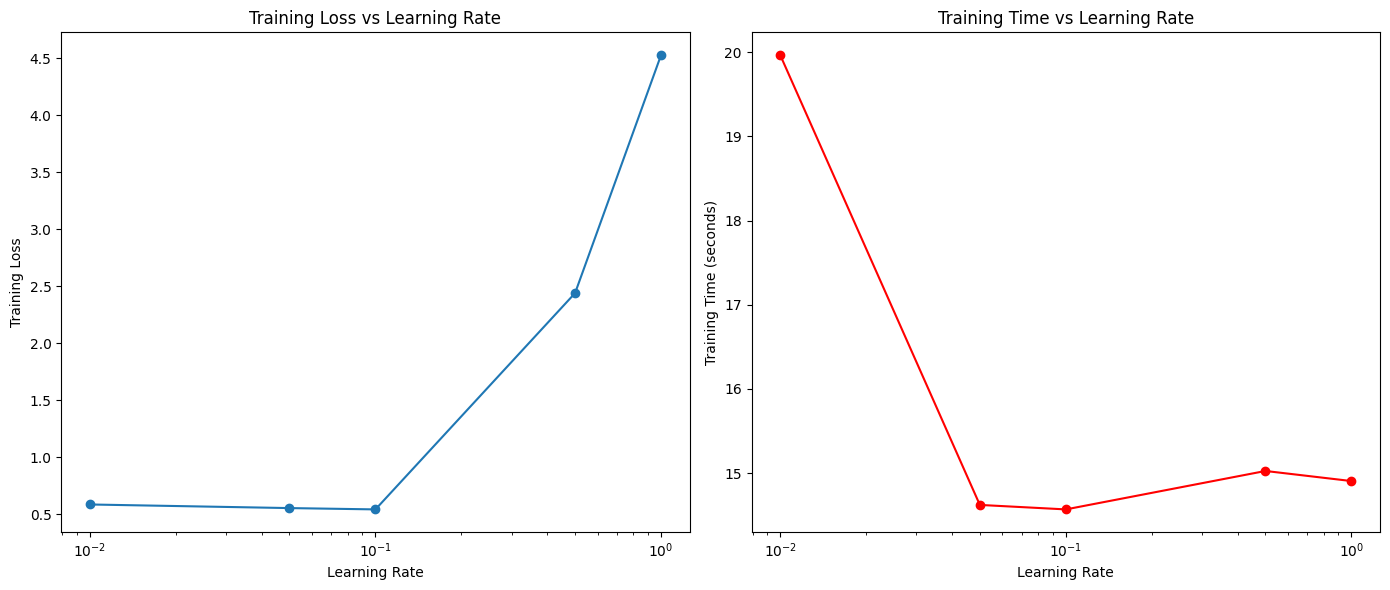

In [26]:
# Assuming you have the class LogisticRegressionGD defined already
learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0]
train_losses = []
train_times = []

for lr in learning_rates:
    gd_model = LogisticRegressionGD(learning_rate=lr, max_iter=1000)
    start_time = time.time()
    gd_model.fit(X_train_processed, y_train)
    train_time = time.time() - start_time
    gd_train_proba = gd_model.predict_proba(X_test_processed)
    train_loss = model.log_loss(y_test, gd_train_proba)

    train_losses.append(train_loss)
    train_times.append(train_time)

# Plotting the results
plt.figure(figsize=(14, 6))

# Plotting Loss vs Learning Rate
plt.subplot(1, 2, 1)
plt.plot(learning_rates, train_losses, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Learning Rate')
plt.xscale('log')  # Log scale to better visualize differences

# Plotting Time vs Learning Rate
plt.subplot(1, 2, 2)
plt.plot(learning_rates, train_times, marker='o', color='r')
plt.xlabel('Learning Rate')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs Learning Rate')
plt.xscale('log')  # Log scale to better visualize differences

plt.tight_layout()
plt.show()

In [ ]:
# Pure Newton's Method Implementation
newton_pure_model = LogisticRegressionNewtonPure(max_iter=10)
start_time = time.time()
newton_pure_model.fit(X_train_processed, y_train)
newton_pure_train_time = time.time() - start_time
newton_pure_train_predictions = newton_pure_model.predict(X_test_processed)
newton_pure_train_proba = newton_pure_model.predict_proba(X_test_processed)
newton_pure_train_loss = log_loss(y_test, newton_pure_train_proba)

NameError: name 'log_loss' is not defined

In [ ]:
# Newton's Method with Fixed Step Size Implementation
newton_fixed_step_model = LogisticRegressionNewtonFixedStep(step_size=1, max_iter=10)
start_time = time.time()
newton_fixed_step_model.fit(X_train_processed, y_train)
newton_fixed_step_train_time = time.time() - start_time
newton_fixed_step_train_predictions = newton_fixed_step_model.predict(X_test_processed)
newton_fixed_step_train_proba = newton_fixed_step_model.predict_proba(X_test_processed)
newton_fixed_step_train_loss = log_loss(y_test, newton_fixed_step_train_proba)

In [ ]:
# Newton's Method with Backtracking Line Search Implementation
newton_backtracking_model = LogisticRegressionNewtonBacktracking(alpha=0.3, beta=0.8, max_iter=10)
start_time = time.time()
newton_backtracking_model.fit(X_train_processed, y_train)
newton_backtracking_train_time = time.time() - start_time
newton_backtracking_train_predictions = newton_backtracking_model.predict(X_test_processed)
newton_backtracking_train_proba = newton_backtracking_model.predict_proba(X_test_processed)
newton_backtracking_train_loss = log_loss(y_test, newton_backtracking_train_proba)

In [ ]:
# scikit-learn Implementation
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
sklearn_model = SklearnLogisticRegression(solver='newton-cg', max_iter=100, random_state=42)
start_time = time.time()
sklearn_model.fit(X_train_processed, y_train)
sklearn_train_time = time.time() - start_time
sklearn_train_predictions = sklearn_model.predict(X_test_processed)
sklearn_train_proba = sklearn_model.predict_proba(X_test_processed)[:, 1]  # Get probabilities for the positive class
sklearn_train_loss = log_loss(y_test, sklearn_train_proba)

In [ ]:
# Create DataFrame to display results
results = pd.DataFrame({
    'Method': ['Gradient Descent', 'scikit-learn', 'Newton\'s Pure', 'Newton\'s Fixed Step', 'Newton\'s Backtracking'],
    'Time (s)': [gd_train_time, sklearn_train_time, newton_pure_train_time, newton_fixed_step_train_time, newton_backtracking_train_time],
    'Loss': [gd_train_loss, sklearn_train_loss, newton_pure_train_loss, newton_fixed_step_train_loss, newton_backtracking_train_loss],
    'Accuracy': [accuracy_score(y_test, gd_train_predictions),
                 accuracy_score(y_test, sklearn_train_predictions),
                 accuracy_score(y_test, newton_pure_train_predictions),
                 accuracy_score(y_test, newton_fixed_step_train_predictions),
                 accuracy_score(y_test, newton_backtracking_train_predictions)]
})

results

,Method,Time (s),Loss,Accuracy
0,Gradient Descent,7.727491,0.54169,0.732521
1,scikit-learn,5.521809,0.51824,0.748321
2,Newton's Pure,75.105494,0.51825,0.748255
3,Newton's Fixed Step,65.674021,0.51825,0.748255
4,Newton's Backtracking,71.019636,0.51825,0.748255


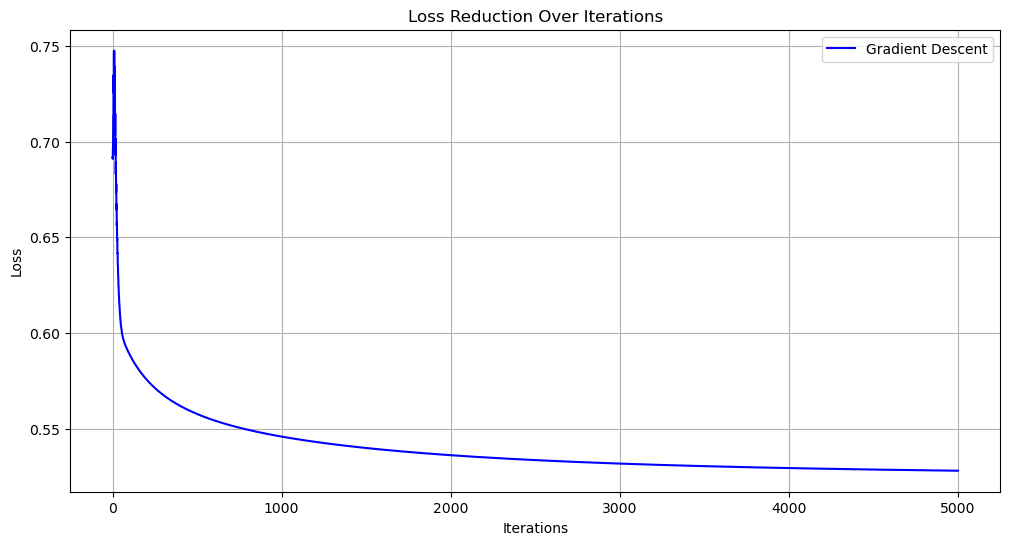

In [ ]:
# Plot loss reduction over iterations
plt.figure(figsize=(12, 6))

plt.plot(gd_model.loss_history, label='Gradient Descent', color='blue')
# plt.plot(newton_model.loss_history, label='Newton\'s Method', color='red')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Reduction Over Iterations')
plt.legend()
plt.grid(True)
plt.show()

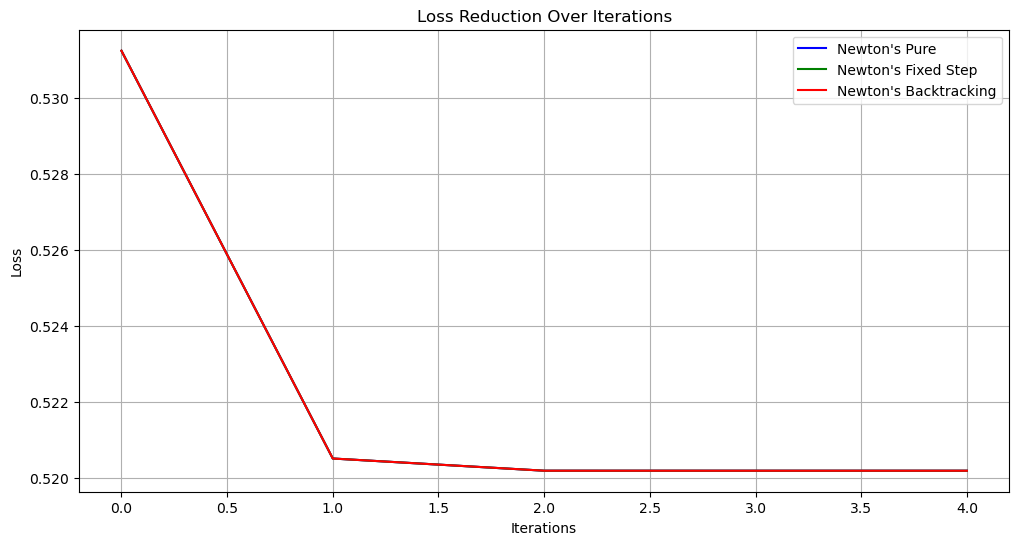

In [ ]:
# Plot loss reduction over iterations
plt.figure(figsize=(12, 6))

plt.plot(newton_pure_model.loss_history, label='Newton\'s Pure', color='blue')
plt.plot(newton_fixed_step_model.loss_history, label='Newton\'s Fixed Step', color='green')
plt.plot(newton_backtracking_model.loss_history, label='Newton\'s Backtracking', color='red')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Reduction Over Iterations')
plt.legend()
plt.grid(True)
plt.show()